<a href="https://colab.research.google.com/github/uttarakhatri/Sleep-stage-EEG-transitions/blob/main/RN_analysis_large_scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing packages
!pip install git+https://github.com/manu-mannattil/nolitsa.git
!pip install pyunicorn
!rm /usr/local/lib/python3.6/dist-packages/pyunicorn/__init__.py

#importing modules
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm
from nolitsa import data, dimension
from pyunicorn.timeseries import RecurrencePlot, RecurrenceNetwork
from scipy.spatial import distance
import pandas as pd
import collections
from multiprocessing import Pool

  Cloning https://github.com/manu-mannattil/nolitsa.git to /tmp/pip-req-build-birdn99q
  Running command git clone -q https://github.com/manu-mannattil/nolitsa.git /tmp/pip-req-build-birdn99q
  Created wheel for nolitsa: filename=nolitsa-0.1-cp36-none-any.whl size=31133 sha256=640fd3f6b6e89d58f01ea8c68cddc127565bdac7057b69b804cbe15412c3c86b
  Stored in directory: /tmp/pip-ephem-wheel-cache-o88xlm42/wheels/9b/2e/49/14f1c7a1b4acd6716bb946b6b40d722c4be76fd0e5b1ade611
Successfully built nolitsa
rm: cannot remove '/usr/local/lib/python3.6/dist-packages/pyunicorn/__init__.py': No such file or directory


In [ ]:
#loading data
sub1= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/1/sub1_ica.npy')
epochs1= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/1/stages_sub1.npy', allow_pickle= True)

In [ ]:
def rnmea(channel):
  rnm = np.zeros((6,8,50))
  ch= ['FR', 'CR', 'OR', 'FL','CL','OL' ]
#embedding and calculating Recurrence NEtwork measures
  for g in range(33,84):
    print(g)
    tau=0
    da= sub1[channel][(g-1)*6000:(g)*6000]
    ma= max(da)
    mi= min(da)
    da= (da-mi)/(ma-mi)
    rel = sm.tsa.acf(da, nlags=75, fft=True)

    #plt.show()
    y= np.arange(0,75,1.0)
    for k in range(len(y)):
      if (rel[k]-(1.0/np.e))<0.000001:
        tau= k
        break
    le=int(len(da)-10*tau)
    dim= np.zeros((10,le))
    I = np.identity(le)
    for i in range(10):
      for j in range(le):
          dim[i][j]=(da[j+i*tau])
    tra=dim.transpose()
    rec_thr= np.arange(0.08,0.45,0.01)
    rec_matrix= np.zeros((le,le))
    rp=0
    rn=0
    for c in range(len(rec_thr)):
      rec_matrix = (distance.cdist(tra,tra,'euclidean')<=rec_thr[c]) -I
      cou= np.sum(rec_matrix, axis=1, dtype= np.float64)
      finalcou= cou.tolist()

      if (np.round((finalcou.count(0))/np.float(le), 2))<=0.01:
        rp = RecurrencePlot(da, dim=10, tau=tau, metric= "euclidean", normalize=False, threshold= rec_thr[c])
        rn = RecurrenceNetwork(da, dim=10, tau=tau, metric= "euclidean", normalize=False, threshold= rec_thr[c])
        break

    #plt.show()
    G = nx.Graph(rec_matrix)
    degree_sequence = np.array((sorted([d for n, d in G.degree()], reverse=True)))
    degree_sequence = degree_sequence
    # degree sequence
    print(degree_sequence)
    degreeCount = (collections.Counter(degree_sequence))
    deg, cnt = zip(*degreeCount.items())

    print(deg)
    print(cnt)
    g=g-1
    m, c = np.polyfit(np.log10(deg[:-6]), np.log10(np.array(cnt[:-6],dtype=float)/np.float(le)), 1)
    rnm[channel-3][0][g]= np.round(m, decimals=3)
    print(m)
    plt.plot(np.log10(deg[:-5]), m*np.log10(deg[:-5]) + c, "-")
    plt.scatter(np.log10(deg[:-1]),np.log10(np.array(cnt[:-1],dtype=float)/np.float(le)), s=0.4, color='b')
    #plt.yscale("log")
    #plt.xscale("log")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.title("Degree Distribution_sub1_FR" +"stage" +  str(epochs1[g]) + "_scaling_factor_" + str(np.round(m, decimals=3)))
    plt.savefig('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/1/Scale_free/FR/_large_scale__FR_' + str(epochs1[g])+'_DD.png')
    plt.show()

    rnm[channel-3][1][g]= rp.recurrence_rate()
    rnm[channel-3][2][g]= rn.global_clustering()
    rnm[channel-3][3][g]= rn.average_path_length()
    rnm[channel-3][4][g]= rn.assortativity()
    rnm[channel-3][5][g]= rn.transitivity()
    rnm[channel-3][6][g]= rp.determinism()
    rnm[channel-3][7][g]= rp.laminarity()
    #networkmeasures
  np.save('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/1/Networkmeasures_33to83.npy', rnm)
  print(rnm)

33
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[125 122 120 ...   0   0   0]
(125, 122, 120, 119, 115, 114, 113, 112, 109, 108, 106, 105, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 2, 3, 4, 3, 7, 3, 3, 3, 4, 4, 3, 3, 5, 1, 6, 4, 5, 3, 5, 4, 2, 8, 2, 10, 4, 12, 6, 9, 5, 4, 12, 7, 4, 10, 9, 9, 14, 10, 17, 8, 10, 10, 20, 13, 12, 19, 16, 17, 17, 21, 22, 22, 17, 32, 18, 32, 20, 26, 35, 25, 31, 34, 25, 21, 40, 37, 35, 52, 37, 41, 47, 59, 53, 49, 38, 49

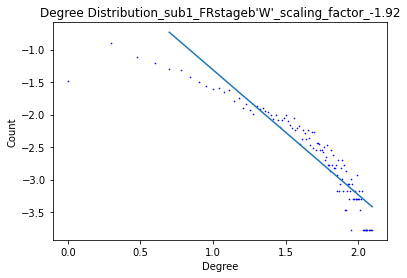

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
34
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[149 128 118 ...   0   0   0]
(149, 128, 118, 117, 107, 106, 104, 102, 99, 98, 92, 91, 90, 89, 88, 87, 86, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)
(1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 2, 1, 2, 2, 2, 3, 5, 3, 3, 1, 1, 1, 2, 6, 7, 6, 3, 4, 2, 3, 4, 2, 5, 7, 9, 5, 6, 4, 9, 3, 12, 6, 4, 11, 9, 5, 9, 10, 15, 9, 4, 14, 11, 1

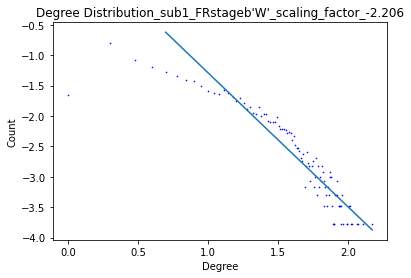

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
35
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[243 209 206 ...   0   0   0]
(243, 209, 206, 193, 191, 184, 178, 177, 176, 173, 170, 162, 161, 160, 156, 155, 154, 152, 151, 150, 149, 148, 147, 146, 144, 143, 142, 141, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 120, 119, 118, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36

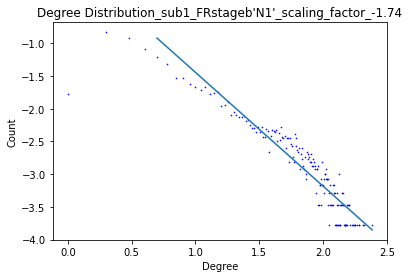

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
36
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[58 57 52 ...  0  0  0]
(58, 57, 52, 50, 48, 47, 46, 43, 42, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)
(1, 1, 1, 2, 2, 1, 3, 4, 4, 2, 5, 4, 6, 5, 4, 5, 4, 4, 4, 9, 19, 12, 17, 19, 16, 15, 30, 33, 36, 37, 41, 51, 50, 57, 79, 91, 93, 119, 151, 151, 205, 256, 276, 339, 412, 575, 920, 1506, 182, 31)
-2.817293446149284


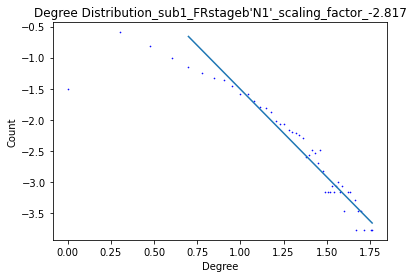

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
37
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[54 54 52 ...  0  0  0]
(54, 52, 51, 50, 48, 47, 45, 44, 41, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)
(2, 1, 2, 1, 3, 2, 2, 1, 1, 4, 4, 3, 8, 2, 5, 6, 5, 7, 3, 5, 8, 8, 11, 9, 13, 11, 15, 17, 19, 24, 26, 26, 34, 43, 55, 47, 72, 81, 138, 162, 195, 242, 302, 454, 657, 1054, 1817, 194, 79)
-2.654632140635228


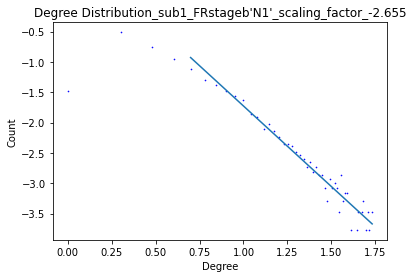

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
38
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[1328 1308 1299 ...    0    0    0]
(1328, 1308, 1299, 1290, 1266, 1249, 1212, 1206, 1199, 1192, 1183, 1181, 1178, 1177, 1171, 1165, 1164, 1163, 1162, 1157, 1155, 1148, 1144, 1143, 1141, 1136, 1135, 1130, 1127, 1123, 1121, 1120, 1103, 1100, 1096, 1094, 1091, 1090, 1088, 1084, 1083, 1081, 1073, 1070, 1068, 1067, 1066, 1065, 1063, 1058, 1055, 1054, 1051, 1049, 1045, 1043, 1039, 1035, 1031, 1029, 1025, 1023, 1020, 1011, 1008, 1004, 997, 994, 993, 991, 990, 985, 983, 981, 977, 974, 970, 967, 962, 961, 960, 956, 955, 953, 952, 951, 944, 942, 940, 938, 933, 932, 931, 930, 927, 924, 920, 918, 914, 913, 912, 90

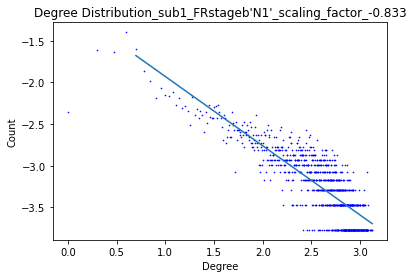

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
39
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[772 765 737 ...   0   0   0]
(772, 765, 737, 713, 699, 697, 696, 695, 691, 661, 618, 615, 613, 605, 600, 596, 591, 588, 585, 584, 583, 582, 581, 578, 573, 570, 565, 564, 561, 559, 558, 552, 548, 547, 546, 544, 536, 535, 534, 533, 532, 531, 522, 520, 519, 514, 511, 510, 502, 498, 497, 496, 495, 494, 492, 486, 485, 484, 482, 480, 477, 476, 472, 471, 468, 467, 466, 465, 464, 463, 460, 459, 458, 454, 452, 450, 449, 447, 445, 442, 440, 435, 433, 431, 430, 429, 428, 427, 426, 424, 421, 420, 416, 413, 412, 406, 405, 403, 400, 397, 396, 394, 393, 392, 390, 389, 388, 386, 384, 382, 381, 380, 379, 378, 377, 376,

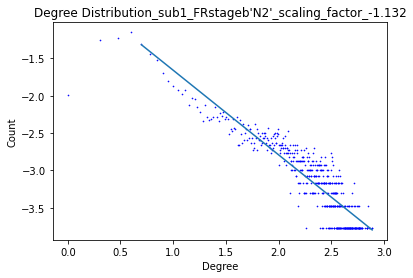

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
40
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[1053 1041 1032 ...    0    0    0]
(1053, 1041, 1032, 1031, 1015, 1007, 1003, 997, 994, 993, 971, 966, 964, 962, 958, 957, 956, 955, 936, 934, 932, 929, 924, 920, 915, 913, 911, 908, 907, 906, 905, 895, 893, 892, 888, 887, 886, 884, 878, 873, 865, 857, 856, 854, 853, 851, 846, 845, 838, 833, 832, 831, 829, 826, 825, 824, 823, 821, 819, 817, 815, 811, 807, 805, 804, 802, 798, 794, 790, 789, 787, 783, 781, 780, 779, 774, 773, 771, 769, 768, 767, 766, 763, 762, 760, 759, 758, 757, 756, 755, 754, 753, 752, 751, 748, 745, 744, 741, 740, 739, 737, 736, 735, 730, 728, 727, 726, 724, 723, 721, 720, 719, 718, 7

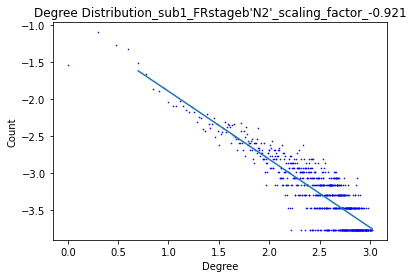

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
41
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[3080 3050 3050 ...    0    0    0]
(3080, 3050, 3049, 3046, 3041, 3035, 3030, 3026, 3022, 3016, 3014, 3013, 3011, 3010, 3007, 3006, 3005, 3003, 2999, 2998, 2997, 2996, 2993, 2990, 2989, 2987, 2986, 2985, 2984, 2983, 2982, 2981, 2980, 2979, 2977, 2976, 2974, 2973, 2972, 2971, 2970, 2969, 2966, 2965, 2964, 2963, 2962, 2960, 2959, 2958, 2957, 2956, 2955, 2954, 2953, 2952, 2951, 2950, 2949, 2948, 2947, 2946, 2945, 2943, 2942, 2941, 2940, 2939, 2938, 2937, 2936, 2935, 2934, 2933, 2932, 2931, 2930, 2929, 2928, 2927, 2926, 2925, 2924, 2923, 2922, 2921, 2920, 2919, 2918, 2917, 2916, 2915, 2914, 2913, 2912, 291

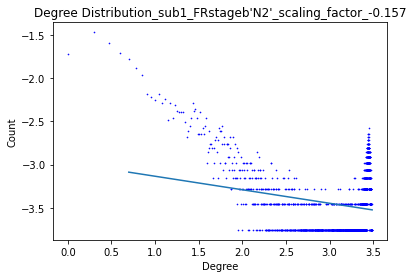

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
42
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[2630 2619 2617 ...    0    0    0]
(2630, 2619, 2617, 2612, 2606, 2604, 2592, 2589, 2568, 2550, 2544, 2538, 2536, 2532, 2531, 2527, 2523, 2514, 2513, 2510, 2500, 2498, 2488, 2487, 2485, 2468, 2449, 2443, 2436, 2421, 2415, 2412, 2410, 2403, 2392, 2390, 2389, 2387, 2378, 2373, 2372, 2367, 2365, 2364, 2363, 2362, 2358, 2357, 2352, 2349, 2342, 2341, 2335, 2320, 2318, 2317, 2313, 2312, 2307, 2305, 2302, 2301, 2300, 2298, 2294, 2292, 2290, 2289, 2286, 2285, 2284, 2283, 2281, 2280, 2279, 2278, 2275, 2272, 2269, 2266, 2264, 2263, 2262, 2261, 2259, 2257, 2256, 2250, 2249, 2248, 2244, 2243, 2242, 2241, 2239, 223

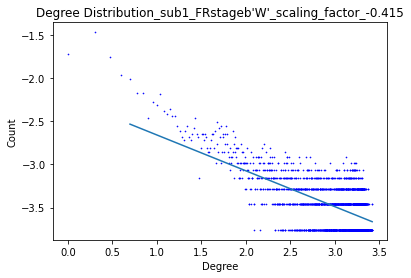

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
43
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[188 163 162 ...   0   0   0]
(188, 163, 162, 160, 157, 153, 152, 150, 149, 148, 145, 143, 142, 141, 139, 137, 136, 135, 134, 133, 132, 131, 130, 128, 127, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 

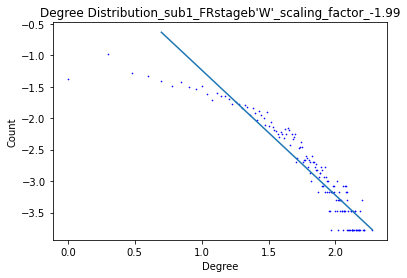

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
44
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[421 421 416 ...   0   0   0]
(421, 416, 408, 403, 391, 387, 383, 369, 368, 362, 361, 358, 357, 355, 350, 349, 345, 344, 343, 342, 341, 339, 338, 337, 336, 331, 329, 328, 325, 321, 320, 318, 317, 316, 313, 310, 304, 302, 301, 300, 299, 298, 297, 296, 294, 292, 291, 290, 288, 286, 285, 284, 283, 282, 281, 280, 279, 278, 277, 276, 274, 271, 270, 269, 268, 267, 266, 265, 264, 262, 261, 260, 259, 258, 257, 256, 255, 254, 253, 251, 250, 249, 248, 247, 246, 245, 244, 242, 241, 240, 239, 238, 237, 236, 235, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213,

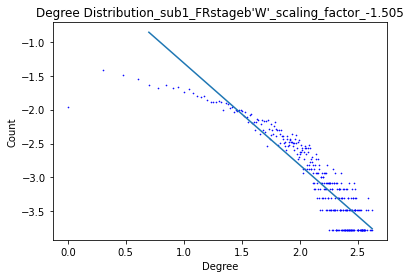

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
45
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[301 297 292 ...   0   0   0]
(301, 297, 292, 258, 257, 256, 250, 249, 239, 237, 234, 230, 228, 225, 216, 213, 211, 206, 204, 203, 202, 199, 198, 197, 196, 195, 194, 193, 191, 190, 189, 188, 185, 183, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 

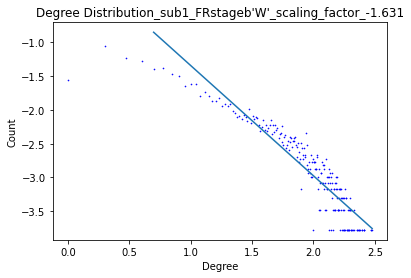

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
46
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[127 126 126 ...   0   0   0]
(127, 126, 122, 119, 113, 112, 110, 104, 103, 102, 101, 99, 97, 96, 94, 93, 90, 87, 86, 85, 84, 82, 81, 80, 79, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)
(1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 6, 3, 3, 1, 4, 4, 2, 2, 3, 6, 5, 3, 8, 8, 5, 6, 5, 6, 7, 6, 5, 6, 8, 6, 8, 8, 10, 7, 12, 8, 4, 17, 16, 10

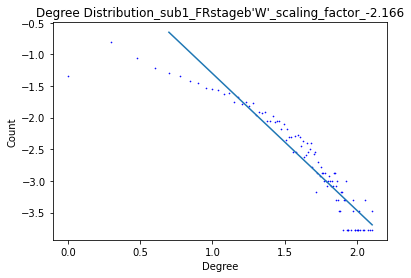

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
47
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[93 87 86 ...  0  0  0]
(93, 87, 86, 85, 79, 78, 77, 76, 75, 73, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)
(1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 4, 4, 3, 3, 6, 4, 3, 3, 4, 6, 4, 4, 9, 8, 4, 8, 11, 12, 9, 12, 14, 17, 20, 18, 21, 16, 34, 27, 28, 22, 27, 27, 39, 34, 26, 36, 55, 45, 43, 38, 47, 55, 56, 69, 68, 97, 75, 108, 101, 88, 118, 111, 131, 142, 131, 149, 140, 151, 176, 188, 214, 264, 273

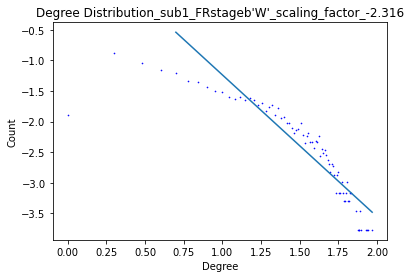

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
48
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[218 197 192 ...   0   0   0]
(218, 197, 192, 174, 163, 161, 159, 157, 152, 148, 144, 143, 139, 138, 137, 136, 135, 132, 130, 129, 127, 125, 124, 123, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 

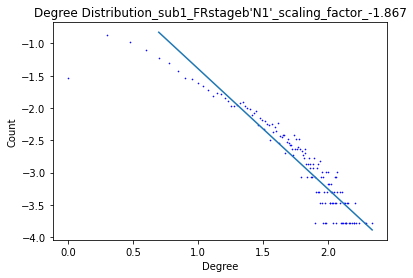

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
49
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[100  99  90 ...   0   0   0]
(100, 99, 90, 85, 84, 82, 73, 71, 69, 68, 66, 65, 62, 61, 60, 59, 58, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)
(1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 3, 2, 4, 2, 3, 3, 3, 6, 10, 5, 5, 2, 11, 7, 8, 11, 7, 7, 13, 8, 13, 14, 9, 15, 17, 11, 7, 13, 10, 20, 24, 22, 22, 31, 27, 18, 34, 41, 36, 33, 39, 48, 54, 75, 58, 62, 79, 108, 82, 116, 124, 163, 175, 214, 299, 454, 662, 1000, 1358, 83, 72)
-2.2210183438

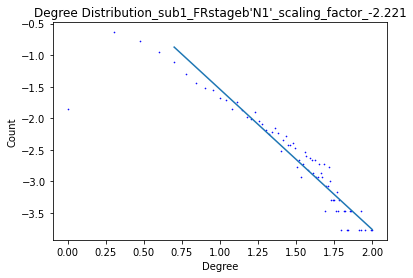

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
50
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[111 110 104 ...   0   0   0]
(111, 110, 104, 102, 101, 99, 95, 94, 87, 86, 84, 83, 80, 79, 78, 77, 75, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)
(1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 3, 3, 5, 2, 2, 3, 5, 2, 1, 2, 6, 4, 3, 3, 3, 3, 7, 2, 6, 6, 10, 7, 4, 9, 8, 10, 5, 11, 8, 14, 13, 15, 16, 11, 10, 19, 10, 17, 13, 22, 17, 13, 22, 31, 37, 24, 25, 31, 37, 40, 47, 47, 49, 52, 5

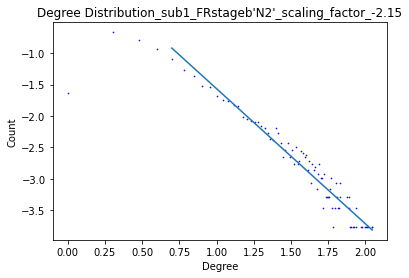

Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
Calculating average (weighted) shortest path length...
Calculating transitivity coefficient (C_1)...
51
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
[1837 1819 1814 ...    0    0    0]
(1837, 1819, 1814, 1813, 1811, 1807, 1801, 1796, 1794, 1789, 1768, 1766, 1759, 1754, 1752, 1749, 1737, 1734, 1730, 1726, 1725, 1724, 1712, 1708, 1707, 1706, 1705, 1700, 1696, 1693, 1690, 1687, 1686, 1685, 1683, 1681, 1678, 1676, 1675, 1671, 1669, 1668, 1665, 1664, 1663, 1660, 1658, 1655, 1654, 1650, 1649, 1645, 1644, 1643, 1642, 1636, 1635, 1634, 1632, 1629, 1625, 1624, 1623, 1622, 1620, 1615, 1613, 1612, 1611, 1609, 1607, 1604, 1603, 1602, 1601, 1600, 1599, 1598, 1597, 1594, 1593, 1592, 1589, 1585, 1584, 1582, 1580, 1575, 1574, 1573, 1572, 1571, 1570, 1569, 1568, 156

IndexError: ignored

In [ ]:
rnmea(3)

Here is the stuff you can ignore. I tried some random things that didn't work.


In [ ]:

def rnmea(channel):
  rnm = np.zeros((6,8,int(12000/6000)))

  ch= ['FR', 'CR', 'OR', 'FL','CL','OL' ]
#import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
  for g in range(1,9):
    tau=0
    da= channel[(g-1)*6000:(g)*6000]
    ma= max(da)
    mi= min(da)
    da= (da-mi)/(ma-mi)
    rel = sm.tsa.acf(da, nlags=75, fft=True)

    #plt.show()
    y= np.arange(0,75,1.0)
    for k in range(len(y)):
      if (rel[k]-(1.0/np.e))<0.000001:
        tau= k
        print(tau)
        break

In [ ]:
import time
lis= np.arange(0,1200)
start= time.time()
if __name__ == '__main__':
    with Pool(2) as p:
        (p.map(rnmea, lis))
print(time.time()-start)


IndexError: ignored

In [ ]:
start= time.time()
rnmea(lis)
print(time.time()-start)


ValueError: ignored